In [34]:
import numpy as np



def crank_nicolson(g: callable,a: callable, b: callable, x0: float, x_m: float, t0: float, t_m: float, N_x: int, N_t: int,req_time_step: int,iflist=True,k=1):
    '''
    # Crank Nicolson Method
    for solving the heat equation of the form u_xx = k*u_t
    ## Parameters
    - g: Initial condition function u(x,t=0) = g(x)
    - a: Boundary condition function u(x=0,t) = a(t)
    - b: Boundary condition function u(x=x_m,t) = b(t)
    - x0: Initial value of x
    - x_m: Final value of x
    - t0: Initial value of t
    - t_m: Final value of t
    - N_x: Number of steps to divide the interval [x0,x_m]
    - N_t: Number of steps to divide the interval [t0,t_m]
    - req_time_step: The time step to which the solution is to be calculated
    - iflist: If True, the function will return the list of u values, if False, the function will return u as a column matrix or a vector
    - k: The thermal diffusivity
    ## Returns
    - x: List of x values
    - t: List of t values
    - u: List of List of u values or vector depending on the value of iflist
    '''
    hx = (x_m - x0) / N_x
    ht = (t_m - t0) / N_t
    x=[x0 + i*hx for i in range(1,N_x)]
    for i in range(1,req_time_step):
        alpha = (ht / (hx**2))/k  
        u = [[g(i)] for i in x]
        B = [[0 for i in range(N_x-1)] for j in range(N_x-1)]    
        I = [[0 for i in range(N_x-1)] for j in range(N_x-1)]   
        for i in range(len(B)):
            for j in range(len(B[i])):
                if i==j:
                    B[i][j]=2*alpha
                    I[i][j]=2
                elif abs(i-j)==1:
                    B[i][j]=-1*alpha

        matrix1=[[I[i][j]-B[i][j] for j in range(N_x-1)] for i in range(N_x-1)]
        matrix2=[[I[i][j]+B[i][j] for j in range(N_x-1)] for i in range(N_x-1)] 
        matrix21=np.linalg.inv(matrix2)
        del matrix2
        matrix3=np.matmul(matrix21,matrix1)     
        del matrix1,matrix21
        matrix4=np.linalg.matrix_power(matrix3,req_time_step)
        del matrix3
    v_req = np.matmul(matrix4,u).tolist()
    del matrix4
    v_req.insert(0,[a(t0)])
    v_req.append([b(t0)])
    x.insert(0,x0)
    x.append(x_m)
    ulist=[]
    if iflist==False:
        return x,v_req,[t0 + i*ht for i in range(N_t+1)]
    else:
        for i in range(len(v_req)):
            ulist.append(v_req[i][0])        
        return x,ulist,[t0 + i*ht for i in range(req_time_step+1)]

In [35]:
z_min = 0
z_max = 2

t_min = 0
t_max = 6

nx = 50
nt = 6000


a1 = 887.258
b1 = 469.858

def g(x):
    return 20

def a(t):
    return 20 + 10 * np.sin(2*np.pi*t/(24*3600))

def b(t):
    return 20


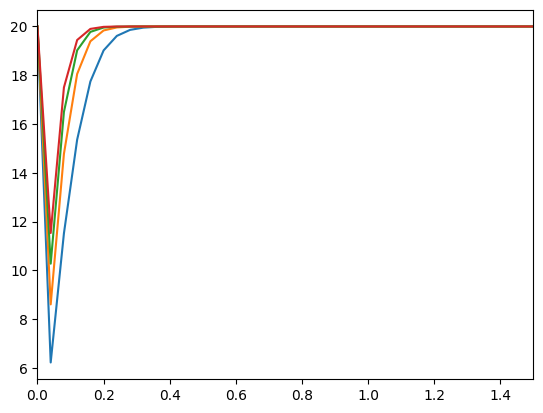

In [36]:


import matplotlib.pyplot as plt
for i in range(1,5):
    x,T,t = crank_nicolson(g,a,b,z_min,z_max,t_min,t_max,nx,nt,5,k=i)
    plt.plot(x,T)
plt.xlim(0,1.5)
plt.show()

